# Student name: 

# Student ID:

## Please do not add further imports. If you think an import is missing, please contact your moderator.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Task 1
Describe (in a markdown cell) how a perceptron can be used to classify two objects given their circumference and weight. You may assume that these two features result in linear separability of the two classes in the given dataset. Use the following terms in your description:

* Input space
* Output space
* Unknown target function
* Data set
* Hypothesis set
* Final Hypothesis
* Error measure
* In-sample error
* Out-of-sample error

## Answer

Provide your answer in this cell

# Task 2
Run the code (or observe the provided outputs) in the E-tivity notebook under Task 2. This code implements so-called learning curves that plot the performance of a model (both in-sample as well as out-of-sample) as this model is trained with an increasing number of data points. 

In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

In [15]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [16]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

[]

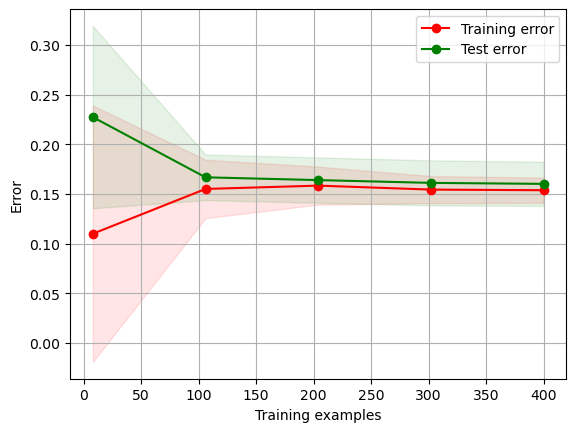

In [19]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5)).plot()

## Neural net learning curves

[]

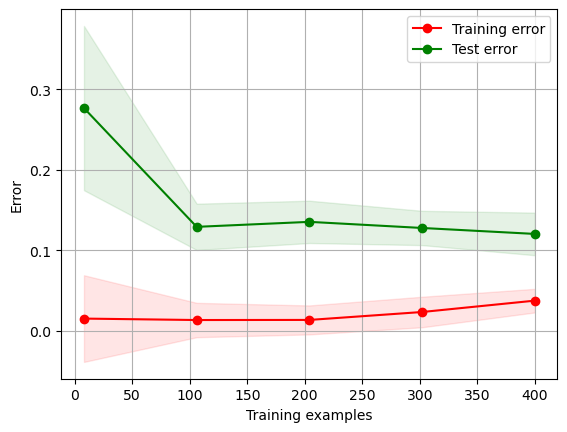

In [20]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5)).plot()

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

## Answer
Provide your answer in this cell

# Task 3
In this last task we will explore the impact of the loss/error function on your model. Task 3a focusses on regression and Task 3b on classification. These two tasks will demonstrate the importance of choosing a suitable loss/error function.

## Provided functions

Below functions implement linear regression and linear classification in a closed form (one-step solution using the pseudo-inverse).

In [ ]:
def linreg_weights(X,y):
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [ ]:
def linreg_predict(w,X):
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a
Use the code provided in the E-tivity notebook under Task 3a to implement a linear regression algorithm trained on dataset Et1_Task3a.csv.

* Add a function implementing the error function used in linear regression. 
* Provide a mathematical function of the regression lines in terms of the weights found by the linear regression algorithm.
* Plot the regression line together  with the data.
* Quantify the error with the error function you have created.
* In new plots, add one data point to the dataset to illustrate how linear regression responds to outliers.

## Answer

In [ ]:
def calc_error(w,X,y):
    # implement your error function for linear regression here

You may add as many cells as you require for your code

## Describe and Explain
Discuss your results and answer the following questions:
* Which data point adds the biggest error term to the optimised error function and how can you quantify this error?
* How do outliers effect linear regression and why?
* Under what circumstances will linear regression with a squared error measure be a good model?

## Answer
Provide your answer in this cell

# Task 3b

* Perform a classification using the provided data in Et1_Task3b.csv.
    * Add a function implementing the error function used in linear classification.
    * Use the provided linear regression code to implement linear classification as described in video 3&nbsp;(book Learning from Data, page 89).
    * Plot the output of your classification as a scatter plot with the colour of the data point indicating its class membership.
    * Plot the decision boundary in the same plot using the provided function.
    * Quantify the error with the error function you have created.
* In new (but similar) plots add one data point to the dataset to illustrate how linear classification responds to outliers.
* Add one more plot of the data with decision boundaries for both linear classification and logistic regression.

## Answer

In [ ]:
def calc_class_error(w,X,y):
    # implement your error function for linear classification here

In [ ]:
def linclass_predict(w,X):
    # implement your linear classification algorithm here

You may add as many cells as you require for your code

## Describe and Explain
Discuss your results and answer the following:
* Quantify the contribution of the outlier to the overall MSE error.
* Provide an absolute maximum for the contribution of the outlier to the error measure used by logistic regression.&nbsp;
* Is linear classification with mean squared error a suitable classifier? Please provide reasons.

## Answer
Provide your answer in this cell

# Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
    </ol>

## Answer 
Provide your answer in this cell

<hr style="border:2px solid gray">

# Appendix

## Demonstration of effect of outlier on linear regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [7]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [8]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.83

Extract weights from model:

In [9]:
w_lr_1 = estimator.intercept_
w_lr_1=np.append(w_lr_1, estimator.coef_)
w_lr_1

array([ 0.0734753 ,  1.13198888, -1.608425  ])

Add outlier:

In [10]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [11]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.8118811881188119

Extract new weight vector from model:

In [12]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

array([ 0.09420734,  0.96672772, -1.03886315])

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

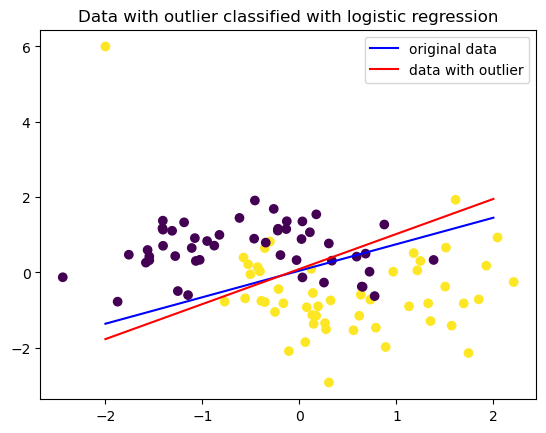

0.6237623762376238

In [13]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr_1[0]/w_lr_1[2]+w_lr_1[1]/w_lr_1[2]*2,-w_lr_1[0]/w_lr_1[2]-w_lr_1[1]/w_lr_1[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)